In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# Models, their parameters, inference times, and MAE values
df1 = {
    "Model": [
        "NBEATS", "NLinear", "DLinear", "TimeMixer", "TSMixer", "TSMixerx", 
        "Informer", "PatchTST", "iTransformer", "KAN", "RMok", 
        "TimeLLM", "TimesFM", "TimeGPT", "Timer", "Moirai", "Chronos"
    ],
    "Model Size": [
        "2.7M", "2.8K", "5.7K", "136K", "62.4K", "66.8K", "1.4 M", "444K", 
        "6.4M", "655K", "42.6K", "178M", "200M", "125M","84M", "311M", "48M"
    ],
    "Inference Time (s)": [
        0.345, 0.623, 0.399, 0.830, 0.820, 0.487, 0.594, 0.250, 0.910, 0.668, 0.454, 2.190, 2.89, 1.528, 1.50, 2.7, 2.08 
    ],

    "MAE": [
        0.175, 0.184, 0.392, 0.3118, 0.1857, 0.3583, 0.478, 0.208, 0.223, 0.214, 0.1907, 0.242, 0.342, 0.238, 0.385, 0.364, 0.088
    ]
}

In [5]:
df1 = pd.DataFrame(df1)
df1

,Model,Model Size,Inference Time (s),MAE
0,NBEATS,2.7M,0.345,0.1750
1,NLinear,2.8K,0.623,0.1840
2,DLinear,5.7K,0.399,0.3920
3,TimeMixer,136K,0.830,0.3118
4,TSMixer,62.4K,0.820,0.1857
5,TSMixerx,66.8K,0.487,0.3583
6,Informer,1.4 M,0.594,0.4780
7,PatchTST,444K,0.250,0.2080
8,iTransformer,6.4M,0.910,0.2230
9,KAN,655K,0.668,0.2140


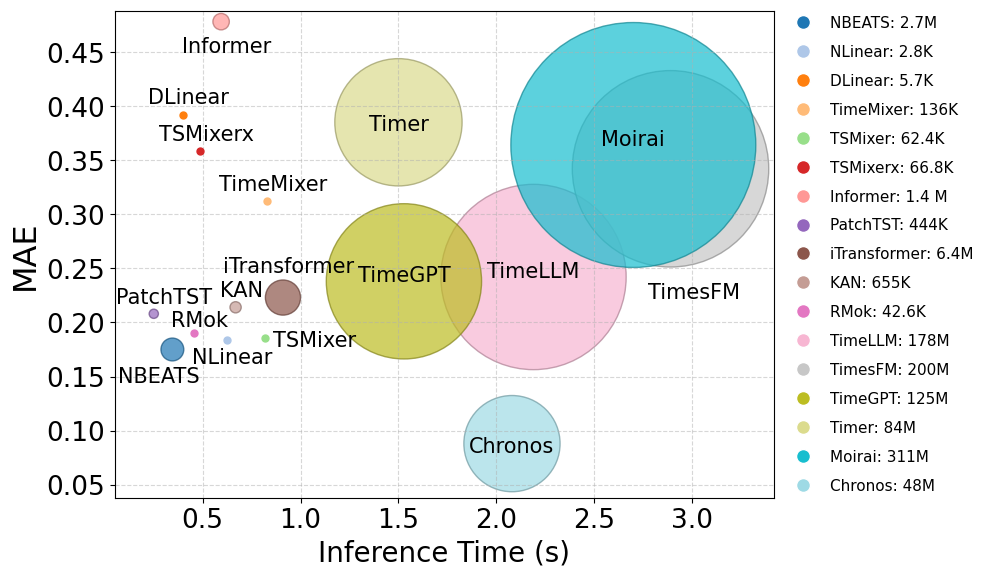

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

# Define the function to convert model sizes with proper scaling
def convert_model_size(size):
    if "M" in size:
        return float(size.replace("M", "")) * 1e6  # Convert millions to numeric
    elif "K" in size:
        return float(size.replace("K", "")) * 1e3  # Convert thousands to numeric
    else:
        return float(size)  # Handle other cases directly as-is

# Apply the conversion to the dataframe
df1["Model Size (numeric)"] = [convert_model_size(size) for size in df1["Model Size"]]
all_models = df1["Model"].unique()  # Get the unique models from the 'Model' column

# Define a color map for models
cmap = plt.get_cmap("tab20")  
colors = cmap(np.linspace(0, 1, len(all_models)))  # Generate a set of colors based on the number of models
color_mapping = {model: colors[i] for i, model in enumerate(all_models)}

# Plotting
plt.figure(figsize=(10, 6))  # Increased figure size to give more space

# Scatter plot with adjusted point sizes based on numeric model size
scatter = plt.scatter(
    df1["Inference Time (s)"],
    df1["MAE"],
    s=df1["Model Size (numeric)"] / 1e4,  # Scale the circle sizes for visualization
    alpha=0.7,
    c=np.arange(len(df1)),  # Use a sequence of integers to assign each model a unique color
    cmap='tab20',  # Use the 'viridis' color map for better color variation
    edgecolors=[tuple((np.array(color_mapping[model]) * 0.7)) for model in df1["Model"]]  # Darker shade of the model color
)


selected_models = {"DLinear", "TSMixerx", "TimeMixer", "RMok", "NLinear", "TSMixer"}

# Plot markers only for selected models
for i, model in enumerate(df1["Model"]):
    if model in selected_models:
        plt.plot(
            df1["Inference Time (s)"][i],
            df1["MAE"][i],
            marker='o',
            markersize=5,
            color=color_mapping[model],  # Use the assigned color for each selected model
            label=model if model not in plt.gca().get_legend_handles_labels()[1] else "",  # Add label only once
            zorder=5  # Place markers on top of other elements
        )

# Annotate each point with the model name and size, with custom positioning for some models
for i, model in enumerate(df1["Model"]):
    annotation = f"{model}"  # Show model name and size
    
    # Custom offset conditions for specific models
    if model == "Chronos":  # Example condition for a specific model
        x_offset = 0.0  # Increase the x_offset significantly for Chronos
        y_offset = -0.008  # Move annotations higher for Chronos
    elif model == "TimeGPT":  # Another example condition
        x_offset = 0.0 # Increase the x_offset for this model as well
        y_offset = 0.0  # Move annotations lower for TimeGPT
    elif model == "TimesFM":  # Another example condition
        x_offset = 0.12 # Increase the x_offset for this model as well
        y_offset = -0.12  # Move annotations lower for TimesFM
    elif model == "Informer":  # Another example condition
        y_offset = -0.028  # Move annotations lower for Informer
        x_offset = 0.03 # Increase the x_offset for this model as well
    elif model == "DLinear":  # Another example condition
        y_offset = 0.01  # Move annotations lower for DLinear
        x_offset = 0.03 # Increase the x_offset for this model as well   
    elif model == "TSMixerx":  # Another example condition
        y_offset = 0.01  # Move annotations lower for TSMixerx
        x_offset = 0.03 # Increase the x_offset for this model as well       
    elif model == "TimeMixer":  # Another example condition
        y_offset = 0.01  # Move annotations lower for TimeMixer
        x_offset = 0.03 # Increase the x_offset for this model as well
    elif model == "KAN":  # Another example condition
        y_offset = 0.01  # Move annotations lower for KAN
        x_offset = 0.03 # Increase the x_offset for this model as well  
    elif model == "NLinear":  # Another example condition
        y_offset = -0.022  # Move annotations lower for NLinear
        x_offset = 0.03 # Increase the x_offset for this model as well  
    elif model == "NBEATS":  # Another example condition
        x_offset = -0.07 # Increase the x_offset for this model as well
        y_offset = -0.03  # Move annotations lower for NBEATS
    elif model == "TSMixer":  # Another example condition
        x_offset = 0.25 # Increase the x_offset for this model as well
        y_offset = -0.008 # Move annotations lower for TSMixer
    elif model == "TimeLLM":  # Another example condition
        x_offset = 0.0 # Increase the x_offset for this model as well 
        y_offset = 0.0 # Move annotations lower for TimeLLM
    elif model == "iTransformer":  # Another example condition
        y_offset = 0.023 # Move annotations lower for iTransformer
        x_offset = 0.03 # Increase the x_offset for this model as well 
    elif model == "PatchTST":  # Another example condition
        x_offset = 0.05 # Increase the x_offset for this model as well 
        y_offset = 0.01 # Move annotations lower for PatchTST
    elif model == "RMok":  # Another example condition 
        y_offset = 0.006 # Move annotations lower for RMok    
    elif model == "Moirai":  # Another example condition 
        y_offset = 0.00 # Move annotations lower for Morai  
    elif model == "Timer":  # Another example condition 
        y_offset = -0.008 # Move annotations lower for Timer           
    else:
        y_offset = 0.0  # Default offset for other models
        x_offset = 0.03  # Apply the same rightward offset for other models
    
    # Add text annotation with adjusted offsets
    plt.text(
        df1["Inference Time (s)"][i] + x_offset,
        df1["MAE"][i] + y_offset,  # Offset for visibility
        annotation,
        fontsize=15,
        ha='center',
        color='black',
        zorder=10  # Place annotations on top of markers
    )
    
# Labels
plt.xlabel("Inference Time (s)", fontsize=20)
plt.ylabel("MAE", fontsize=23)

# Grid and formatting
plt.grid(alpha=0.5, linestyle="--")
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)

# Adjust axis limits with additional padding
plt.xlim(min(df1["Inference Time (s)"]) - 0.075 * (max(df1["Inference Time (s)"]) - min(df1["Inference Time (s)"])),
         max(df1["Inference Time (s)"]) + 0.2 * (max(df1["Inference Time (s)"]) - min(df1["Inference Time (s)"])) )

plt.ylim(min(df1["MAE"]) - 0.05, max(df1["MAE"]) + 0.01)

# Create custom legend with matching colors
handles = [mlines.Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=10) 
           for color in colors]
labels = [f"{df1['Model'][i]}: {df1['Model Size'][i]}" for i in range(len(df1))]

# Display legend on the right side, with an extended width to span longer
plt.legend(handles=handles, labels=labels, 
           loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11, 
           frameon=False, title_fontsize=12, labelspacing=0.91, columnspacing=1, 
           ncol=1)  # Set ncol=1 to have one column that is taller and longer

# Adjust layout and show plot
plt.tight_layout()  # Automatically adjust the plot to ensure everything fits
plt.savefig('Picture4.3.png', dpi=400)
plt.show()
